In [ ]:
import matplotlib.pyplot as plt
import os
import shutil
import zipfile
import glob
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import random

In [7]:
from PIL import Image

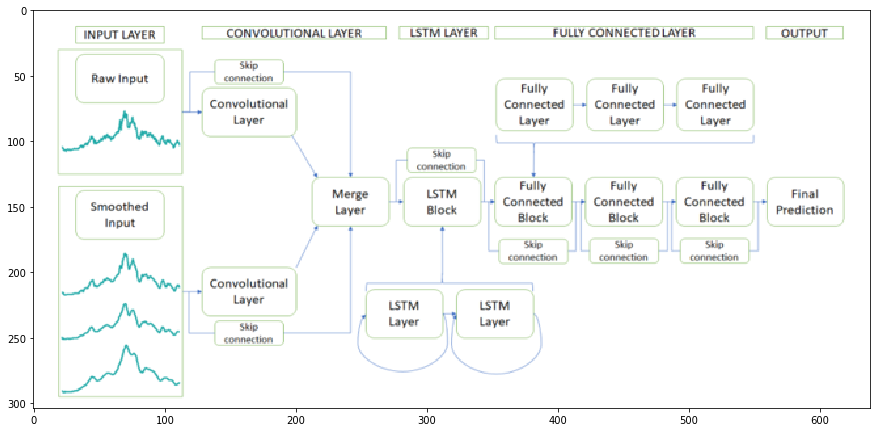

In [9]:
img = Image.open('C:/Users/begas/Desktop/ficture.png')
fig, ax = plt.subplots(figsize = (15,10))
ax.imshow(img)

In [19]:
# Input Layer
layer_input_0 = tf.keras.Input(shape = (65,65,1), name = "input_0") # Input for Merge Layer -> skim Conv Layer
layer_input_1 = tf.keras.Input(shape = (65,65,1), name = "input_1") # Input for Conv Layer


# Conv 2D Layer ======================================================================
Conv_layer  = tf.keras.layers.Conv2D(32, kernel_size = 3, padding='same')(layer_input_1)
Conv_layer  = tf.keras.layers.Activation('relu')(Conv_layer)

for conv_filter in [64,128]:
    Conv_layer  = tf.keras.layers.Conv2D(conv_filter, kernel_size = 3, padding='same')(Conv_layer)
    Conv_layer  = tf.keras.layers.BatchNormalization()(Conv_layer)
    Conv_layer  = tf.keras.layers.Activation('relu')(Conv_layer)
#     Conv_layer  = tf.keras.layers.MaxPooling2D(pool_size = 2)(Conv_layer)


# Merge Layer / input and Conv_layer =================================================
# Merge_layer = tf.keras.layers.average([layer_input_0, Conv_layer])
# Merge_layer = tf.keras.layers.add([layer_input_0, Conv_layer])
Merge_layer = tf.keras.layers.concatenate([layer_input_0, Conv_layer])

# Reshape Layer / Connect LSTM layer =================================================
Reshape_layer = tf.keras.layers.Reshape(target_shape=(Merge_layer.shape[1], Merge_layer.shape[2] * Merge_layer.shape[3]), name="reshape")(Merge_layer)
Reshape_layer = tf.keras.layers.Dense(64, activation="relu", name="dense")(Reshape_layer)

# LSTM Layer =========================================================================
LSTM_layer = tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.25)(Reshape_layer)

# Output Layer =======================================================================
Output_layer = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units = 1, activation = 'linear', name = 'output'))(LSTM_layer)

# Create CNN LSTM Model ==============================================================
cnn_lstm_model = tf.keras.Model([layer_input_0, layer_input_1], Output_layer)

cnn_lstm_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65, 65, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 65, 65, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 65, 65, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 65, 65, 64)   18496       activation[0][0]                 
______________________________________________________________________________________________